# Projet numérique
## Equations différentielles

Sophian AKKARI et Arthur BLANCHIET

### Question 1

$x_1$ correspond à la population de proies, $x_2$ à celle de prédateurs, $\dot x_1$ et $\dot x_2$ correspondent donc à leurs variations temporelles.

$\alpha$ représente la multiplication naturelle des proies et $\gamma$ la mortalité naturelle des prédateurs. $\beta$ et $\delta$ permettent de modéliser les interactions entre les deux populations.

On étudie donc l'équation différentielle $\dot x =f(x)$ avec $f : x=(x_1,x_2) \longmapsto \begin{pmatrix} x_1(\alpha - \beta x_2) \\ -x_2(\gamma - \delta x_1)\end{pmatrix}$.

Elle possède deux points d'équilibre : $(0,0)$ et $\bar x = (\dfrac{\gamma}{\delta},\dfrac{\beta}{\alpha})$. Le premier n'est pas stable : si on initialise par exemple avec $0$ prédateur, on a une croissance exponentielle du nombre de proies quelque soit le nombre de proies à l'initialisation. Pour $\bar x$ on ne peut encore rien dire.

### Question 2

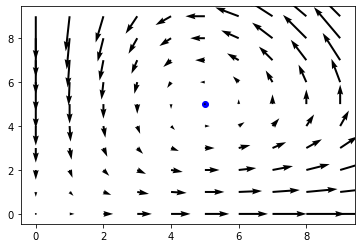

In [53]:
import matplotlib.pyplot as plt
import numpy as np

alpha, beta, gamma, delta = 1,.2,1,.2 # donc \bar x = (5,5)
x = np.arange(0, 10, 1)
y = np.arange(0, 10, 1)
X, Y = np.meshgrid(x, y)
X_p = X * (alpha - beta * Y)
Y_p = - Y * (gamma - delta * X)
plt.scatter(alpha/beta, gamma/delta, c = 'blue') # on affiche \bar x
plt.quiver(X, Y, X_p, Y_p)
plt.show()

On peut donc supposer que les solutions effectuent des "cercles" (parcourent des courbes fermées) dans le plan ($x_1$, $x_2$) autour du point $\bar x$.

### Question 3
On applique le théorème de Cauchy-Lipschitz au problème :
$$
\left\{
    \begin{array}{ll}
        \dot x=f(t,x) \\
        x(t_0)=x_0
    \end{array}
\right.
$$
où $t_0 \in \mathbf{R}$ et $x_0 \in (\mathbf{R_+^*})^2$.

On a :
$$
\partial_x f = \begin{pmatrix} \alpha - \beta x_2 & - \beta x_1 \\ \delta x_2 & - \gamma + \delta x_1 \end{pmatrix} 
$$
donc $f$ est continûment dérivable. On peut donc bien appliquer le théorème de Cauchy-Lipschitz. Ainsi, ce problème de Cauchy possède une unique solution maximale.
Cette solution $x: I \rightarrow \mathbf{R}^n$ est à valeurs dans $(\mathbf{R}_+^*)^2$ par définition d'une solution du problème de Cauchy. Comme les autres solutions sont toutes des restrictions de $x$, elles sont aussi à valeurs dans $(\mathbf{R}_+^*)^2$.

### Question 4

Soit $x$ une solution initialisée dans $(\mathbb{R}^{*}_+)^2$. Ainsi, pour tout $t \in \mathbb{R}$, $x(t) \in (\mathbb{R}^{*}_+)^2$. Pour tout $t \in \mathbb{R}$, $\dfrac{d}{dt} H(x(t)) = \delta \dot x_1(t) - \dfrac{\gamma}{x_1(t)} \dot x_1(t) + \beta \dot x_2(t) - \dfrac{\alpha}{x_2(t)} \dot x_2(t)$. Puisque $x$ est solution des équations de Lotka-Volterra, on trouve $ \dfrac{d}{dt} H(x(t)) = 0 $.

On va utiliser le théorème du domaine maximal d'existence. $x$ est définie sur $]t_{m}^-,t_{m}^+[$. Montrons que $t_{m}^+$ n'est pas fini. S'il l'était, on aurait $||x(t)|| \rightarrow +\infty$ quand $t \rightarrow t_{m}^+$ i.e $x_1(t) \rightarrow + \infty$ ou $x_2(t) \rightarrow + \infty$ quand $ t \rightarrow t_{m}^+$ ce qui entraînerait $H(x(t)) \rightarrow + \infty$ quand $t \rightarrow t_{m}^+$ par croissances comparées, ou bien $d(t,x(t),(\mathbb{R},(\mathbb{R}_{+}^*)^2)) \xrightarrow[t \rightarrow t_{m}^+]{} 0$ i.e $x_1 \xrightarrow[t \rightarrow t_{m}^+]{} 0$ et $x_2 \xrightarrow[t \rightarrow t_{m}^+]{} 0$ ce qui entraînerait $H(x(t)) \xrightarrow[t \rightarrow t_{m}^+]{} +\infty$. Or $H \circ x$ ne peut pas tendre vers $+\infty$ car elle est constante. Donc $t_{m}^+ = +\infty$. En procédant de même pour $t_m^-$, on obtient que $x$ est définie sur $\mathbb{R}$ tout entier.

On a donc bien montré que toute solution maximale initialisée sur $(\mathbb{R}^{*}_+)^2$ est définie sur $\mathbb{R}$ entier.


### Question 5
Pour tracer les courbes de niveau, on réutilise la fonction fournie pour le projet Calcul Différentiel.

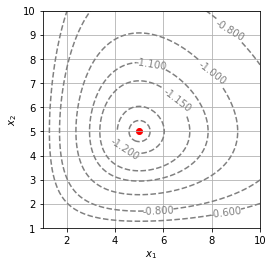

In [54]:
def display_contour(f, x, y, levels):
    X, Y = np.meshgrid(x, y)
    Z = f(X, Y)
    fig, ax = plt.subplots()
    contour_set = plt.contour(
        X, Y, Z, colors="grey", linestyles="dashed", 
        levels=levels 
    )
    ax.clabel(contour_set)
    plt.grid(True)
    plt.xlabel("$x_1$") 
    plt.ylabel("$x_2$")
    plt.gca().set_aspect("equal")


alpha, beta, gamma, delta = 1,.2,1,.2 # donc \bar x = (5,5)

def H_courbes(x,y) :
    return delta*x - gamma*np.log(x) + beta*y - alpha*np.log(y)

display_contour(
    H_courbes, 
    x=np.linspace(1, 10, 91),
    y=np.linspace(1, 10, 91),
    levels=[-1.215,-1.2, -1.15, -1.1, -1, -.8, -.6]
)
plt.scatter(alpha/beta, gamma/delta, c = 'red') # on affiche \bar x

plt.show()

Le point $\bar x$ (en rouge sur la figure) se trouve au centre des courbes de niveau.

Les iso-$H$ correspondent chacun à la trajectoire d'un problème de Cauchy (plus exactement de tous les problèmes de Cauchy initialisés de sorte que H ait cette valeurs). On en déduit donc que les solutions décrivent des trajectoires courbes fermées autour du point d'équilibre $\bar x$.

Graphiquement, on constate que $\bar x$ est stable. En effet, si on initialise une solution suffisament proche de $\bar x$, alors cette solution va décrire une sorte de cercle (déformé) autour de $\bar x$, donc va rester à une distance bornée de $\bar x$.

### Question 6

In [55]:
def solve_euler_explicit(f, x0, dt, t0, tf):
    liste_t = [t0]
    liste_x = [x0]
    tj=t0
    xj=x0
    while tj < tf :
        xj = xj + dt*f(tj, xj)
        tj += dt
        liste_t.append(tj)
        liste_x.append(xj)
    t=np.array(liste_t)
    x=np.array(liste_x)
    return t, x

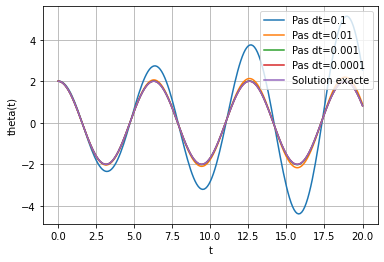

In [56]:
# On teste la fonction avec l'équation différentielles de l'oscillateur harmonique
def OH(t,x):
    a,b=x
    return np.array([-b,a])

# On trace les solutions pour différents pas dt
for dt in [.1,.01,.001, .0001] :
    T,X=solve_euler_explicit(OH, np.array([0,2]), dt, 0, 20)
    xp,x=X.transpose()
    plt.plot(T,x, label=f'Pas dt={dt}')

# On trace aussi la solution exacte
plt.plot(T,2*np.cos(T), label="Solution exacte")

plt.legend()
plt.grid(True)
plt.xlabel("t")
plt.ylabel("theta(t)")
plt.show()

On a bien convergence du schéma d'Euler explicite lorsque le pas $\text{d}t$ tend vers 0.

Pour visualiser l'ordre de convergence, il faut tracer
$$
f_p(\Delta t) = \frac{\text{max} \, ||x^j - x(t_j) ||}{\Delta t ^p}
$$
pour différentes valeurs de $p$. L'ordre de convergence sera la valeur de $p$ pour laquelle $f_p$ est bornée.

Ici, il faudrait faire le test avec l'oscillateur harmonique plutôt qu'avec les équations de Lotka-Volterra car la convergence est meilleure.

### Question 7

[]

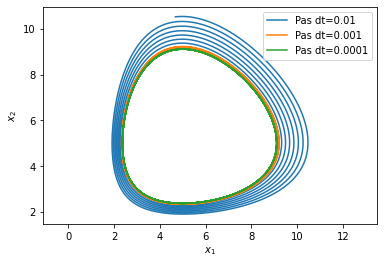

In [57]:
# On utilise le schéma d'Euler explicite pour simuler les équations de Lotka-Volterra

alpha, beta, gamma, delta = 1,.2,1,.2

def LV(t,x):
    a,b=x
    return np.array([a*(alpha-beta*b), -b*(gamma-delta*a)])

# On trace les solutions pour différents pas dt
for dt in [.01, .001, .0001] :
    T,X=solve_euler_explicit(LV, np.array([3,3]), dt, 0, 50)
    x1,x2=X.transpose()
    plt.plot(x1,x2, label=f'Pas dt={dt}')

plt.legend()
plt.axis("equal")
# plt.grid(True)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.plot()

On voit que la solution n'est pas correcte. En effet, elle ne reste pas sur une trajectoire fermée (qui correspondent aux courbes de niveau de $H$).

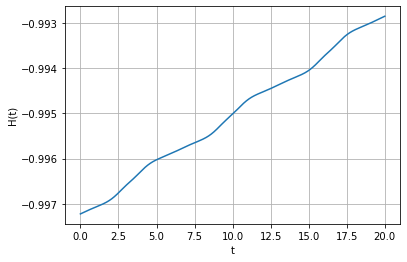

In [58]:
# Evolution de la fonction H

def H(x):
    x1,x2=x
    return delta*x1 - gamma*np.log(x1) + beta*x2 - alpha*np.log(x2)

T,X=solve_euler_explicit(LV, np.array([3,3]), .001, 0, 20)
tX=X.transpose()
plt.plot(T,H(tX))

plt.grid(True)
plt.xlabel("t")
plt.ylabel("H(t)")
plt.show()

On constate en effet que H n'est pas constant sur la trajectoire de la solution alors qu'il devrait l'être (d'après la question 4).

### Question 8

In [59]:
def solve_euler_implicit(f, x0, dt, t0, tf, itermax = 100):
    liste_t = [t0]
    liste_x = [x0]
    tj=t0
    xj=x0
    while tj < tf :
        xj0 = xj + dt*f(tj, xj)
        tj += dt
        xk=xj0
        for k in range(itermax):
            if np.linalg.norm((xj+dt*f(tj,xk) - xk)/xj0) < .00001 :
                break
            xk=xj+dt*f(tj,xk)
        xj=xj+dt*f(tj,xk)
        liste_t.append(tj)
        liste_x.append(xj)
    t=np.array(liste_t)
    x=np.array(liste_x)
    return t, x

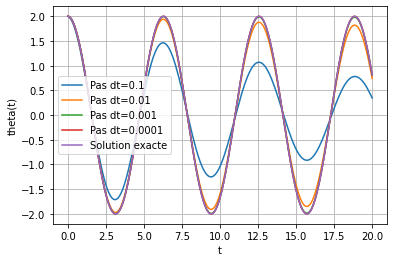

In [60]:
# Test avec l'équation de l'oscillateur harmonique

for dt in [.1,.01,.001, .0001] :
    T,X=solve_euler_implicit(OH, np.array([0,2]), dt, 0, 20, 50)
    xp,x=X.transpose()
    plt.plot(T,x, label=f'Pas dt={dt}')

plt.plot(T,2*np.cos(T), label="Solution exacte")

plt.legend()
plt.grid(True)
plt.xlabel("t")
plt.ylabel("theta(t)")
plt.show()

On a bien convergence du schéma d'Euler implicite lorsque le pas $\text{d}t$ tend vers 0.

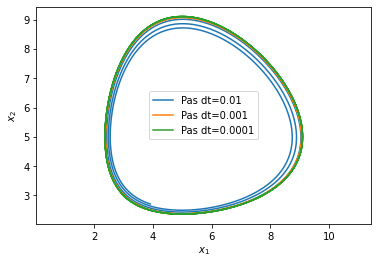

In [61]:
# On utilise le schéma d'Euler implicite pour simuler les équations de Lotka-Volterra

for dt in [.01, .001, .0001] :
    T,X=solve_euler_implicit(LV, np.array([3,3]), dt, 0, 20)
    x1,x2=X.transpose()
    plt.plot(x1,x2, label=f'Pas dt={dt}')

plt.legend()
plt.axis("equal")
# plt.grid(True)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.show()

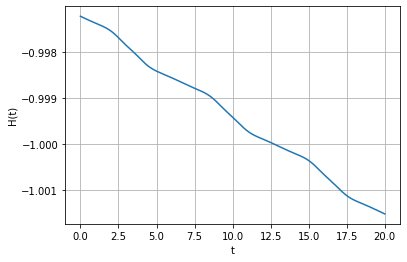

In [62]:
# Evolution de la fonction H

T,X=solve_euler_implicit(LV, np.array([3,3]), .001, 0, 20)
tX=X.transpose()
plt.plot(T,H(tX))

plt.grid(True)
plt.xlabel("t")
plt.ylabel("H(t)")
plt.show()

On se rend à nouveau compte que $H$ n'est pas constant le long de la trajectoire, ce qui prouve que la solution obtenue n'est pas fidèle.

### Question 9

Puisque $H$ est constante le long des solutions de Lotka-Volterra, on remarque que toute solution de Lotka-Volterra est solution des nouvelles équations.

On s'intéresse maintenant à ces dernières. On peut les écrire $\dot x = \tilde f(x)$ avec $\tilde f$ continûment différentiable car $u$ et $H$ le sont sur $(\mathbb{R}^{*}_+)^2$. Grâce au théorème de Cauchy-Lipschitz, on sait que sur $(\mathbb{R}^{*}_+)^2$, il existe une unique solution maximale à cette équation pour un couple $(t_0,x_0)$ donné. Celle de Lotka-Volterra pour le même $(t_0,x_0)$ convient (elle est maximale car définie sur $\mathbb{R}$ entier d'après la question 4). C'est donc la seule.

On a alors bien montré l'égalité des ensembles de solution.

### Question 10
En se donnant $k>0$ et en posant $u=-k\nabla H$ on obtient l'égalité demandée. D'autre part, pour x dans $(\mathbb{R}_+^*)^2$, on a $\nabla H(x)= (\delta -\dfrac{\gamma}{x_1},\beta - \dfrac{\alpha}{x_2})$. Chaque composante est strictement croissante et le gradient ne s'annule qu'en $\bar x$.

Supposons que $x$ reste à une distance supérieure strictement positive de $\bar x$, que l'on note $d$ (ie $\forall t \in \mathbb{R}, ||\bar x - x(t)|| > d$). Alors, on a soit $|x_1-\bar x_1|>\sqrt d$ soit $|x_2-\bar x_2|>\sqrt d$, donc en posant $m=\text{min} \, (|\delta -\dfrac{\gamma}{\bar x_1 - \sqrt d}|,|\delta -\dfrac{\gamma}{\bar x_1 + \sqrt d}|,|\beta - \dfrac{\alpha}{\bar x_2 - \sqrt d }|,|\beta - \dfrac{\alpha}{\bar x_2 + \sqrt d }|)$, on peut écrire $||\nabla H(x)||^2 \ge  c^2 $ ($c=m/\sqrt 2$).

Il y a deux cas :
* si $H(t) > H_0$ alors $\frac{\text{d}}{\text{d}t} (H(x(t))-H_0) = - k \, ||\nabla H(x(t)) ||^2 (H(x(t))-H_0) \le - k c^2 (H(x(t)) - H_0) < 0$ donc la décroissance est au moins exponentielle ;
* si $H(t) < H_0$ alors $0 < - k c^2 (H(x(t)) - H_0) \le  - k \, ||\nabla H(x(t)) ||^2 (H(x(t))-H_0) = \frac{\text{d}}{\text{d}t} (H(x(t))-H_0)$ donc la croissance est au moins exponentielle.

Dans les deux cas, il y a convergence au moins exponentielle de $H(x(t))-H_0$ vers $0$ donc de $H(x(t))$ vers $H_0$ lorsque $t$ tend vers l'infini.

### Question 11
On se base sur le schéma d'Euler implicite.

In [63]:
def solve_euler_implicit_LV(x0, dt, t0, tf, itermax = 100):
    H0=H(x0)
    def LV_alt(t,x):
        return LV(t,x) - (H(x) - H0)*u(x) # on a besoin d'inclure LV dans le schéma car elle dépend de H(x(0)) donc de x0
    liste_t = [t0]
    liste_x = [x0]
    tj=t0
    xj=x0
    while tj < tf :
        xj0 = xj + dt*LV_alt(tj, xj)
        tj += dt
        xk=xj0
        for k in range(itermax):
            if np.linalg.norm((xj+dt*LV_alt(tj,xk) - xk)/xj0) < .00001 :
                break
            xk=xj+dt*LV_alt(tj,xk)
        xj=xj+dt*LV_alt(tj,xk)
        liste_t.append(tj)
        liste_x.append(xj)
    t=np.array(liste_t)
    x=np.array(liste_x)
    return t, x

def u(x):
    x1,x2=x
    return k*np.array([delta - gamma / x1, beta - alpha / x2])

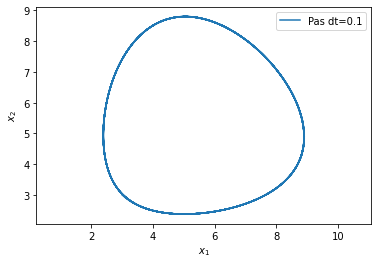

In [64]:
k=100
dt=.1

T,X=solve_euler_implicit_LV(np.array([3,3]), dt, 0, 50)
x1,x2=X.transpose()
plt.plot(x1,x2, label=f'Pas dt={dt}')

plt.legend()
plt.axis("equal")
# plt.grid(True)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.show()

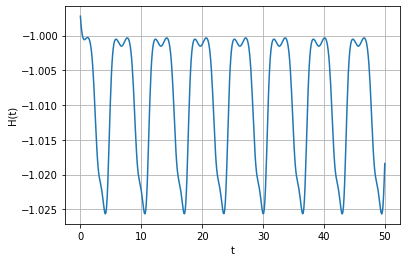

In [65]:
# Evolution de la fonction H

T,X=solve_euler_implicit_LV(np.array([3,3]), dt, 0, 50)
tX=X.transpose()
plt.plot(T,H(tX))

plt.grid(True)
plt.xlabel("t")
plt.ylabel("H(t)")
plt.show()

On constate qu'un pas de dt=0.1 suffit pour avoir une précision correcte (alors qu'il fallait avoir dt=0.001 précédément pour une même précision).

Montrons maintenant que k ne peut pas être choisi trop grand.

En utilisant le schéma d'Euler explicite, on effectue le développement au premier ordre en $\text{d}t$ de $H(x_j)-H_0$ :
$$
\begin{align*}
H(x_{j+1}) - H_0 &=H(x_j + \text{d}t \, f(t_j, x_j)) \\
&=H (x_j) + \text{d}t \, J_H(x_j) \cdot f(t_j,x_j) - H_0 \\
&=H (x_j) + \text{d}t \, \frac{\text{d}}{\text{d}t} (H(x_j)-H_0) - H_0 \\
&=H (x_j) - \text{d}t \, k \, ||\nabla H(x_j) ||^2 (H(x_j)-H_0) - H_0 \\
&= (H(x_j)-H_0) (1-\text{d}t \, k \, ||\nabla H(x_j) ||^2) \\
\end{align*}
$$

Pour que $H(x_j)-H_0$ converge vers 0, il faut donc que $| 1-\text{d}t \, k \, ||\nabla H(x_j) ||^2 |<1$, ce qui s'écrit :
$$
k < \frac{2}{\text{d}t \, ||\nabla H(x_j) ||^2}.
$$
Montrons par un exemple que si $k$ est trop grand, le schéma numérique donne un mauvais résultat. On choisit un point de départ avec un gradient plus élévé, donc la valeur maximale pour $k$ sera plus petite.

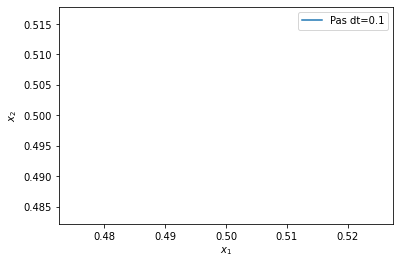

In [66]:
T,X=solve_euler_implicit_LV(np.array([.5,.5]), dt, 0, 20)
x1,x2=X.transpose()
plt.plot(x1,x2, label=f'Pas dt={dt}')

plt.legend()
plt.axis("equal")
# plt.grid(True)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.show()

La solution est très étrange : elle ne décrit plus une jolie courbe et elle ne se boucle pas.

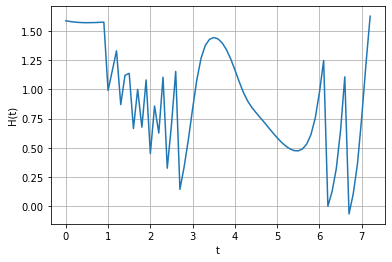

In [67]:
k=.5
dt=.1

T,X=solve_euler_implicit_LV(np.array([.5,.5]), dt, 0, 20)
tX=X.transpose()
plt.plot(T,H(tX))

plt.grid(True)
plt.xlabel("t")
plt.ylabel("H(t)")
plt.show()

A $t=7$, on constate que la solution ne se trace plus. De plus, les variations de $H$ sont beaucoup plus importantes : de l'ordre de 1 contre .001 précédement.